In [180]:
import pandas as pd
import numpy as np
import re
import datetime

data=pd.read_csv('saomai.csv',delimiter=" ")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=",")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=";")
if "." in data['TIME'][0]:
    data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]
data.replace("---",np.NaN,inplace=True)
for col in data.select_dtypes('object').columns:
    try:
        data[col]=data[col].astype(float)
    except ValueError:
        continue
data = data.round(3)
data['TIME']=data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S'))
# datetime.datetime.strptime(data['TIME'], '%H:%M:%S').time()
# data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.time
data.to_csv("test.csv",float_format='%.3f',date_format='%H:%M:%S')

Active =['ppc:P[^F]','pccm.*:ACTP_TOT',"epm.*:ACTP_TOT","pccs.*:ACTP_TOT"]
P = [l for k in Active for l in data.columns if re.match(k,l)]
Reactive =['ppc:Q.*','pccm.*:REACTP_TOT',"epm.*:REACTP_TOT","pccs.*:REACTP_TOT"]
Q = [l for k in Reactive for l in data.columns if re.match(k,l)]
Voltage =['ppc:V','pccm.*:VABC_AVG',"epm.*:VABC_AVG","pccs.*:VABC_AVG"]
V = [l for k in Voltage for l in data.columns if re.match(k,l)]
Frequency=['ppc:F','pccm.*:F',"epm.*:F","pccs.*:F"]
F = [l for k in Frequency for l in data.columns if re.match(k,l)]
PowerFactor=['ppc:PF','pccm.*:PF',"epm.*:PF","pccs.*:PF"]
PF = [l for k in PowerFactor for l in data.columns if re.match(k,l)]

Active_Setpoint = ['apc:PSP']
PSP = [l for k in Active_Setpoint for l in data.columns if re.match(k,l)]
Reactive_Setpoint = ['rpc:QSP']
QSP = [l for k in Reactive_Setpoint for l in data.columns if re.match(k,l)]
QV_Setpoint = ['rpc:VSP']
QV_VSP = [l for k in QV_Setpoint for l in data.columns if re.match(k,l)]
AVR_Setpoint = ['avr:VSP']
AVR_VSP = [l for k in AVR_Setpoint for l in data.columns if re.match(k,l)]
Frequency_Setpoint = ['apc:FSP']
FSP = [l for k in Frequency_Setpoint for l in data.columns if re.match(k,l)]
PowerFactor_Setpoint = ['pfc:PFSP']
PFSP = [l for k in PowerFactor_Setpoint for l in data.columns if re.match(k,l)]

Active_En = ['apc:En']
PEn = [l for k in Active_En for l in data.columns if re.match(k,l)]
Reactive_En = ['rpc:En']
QEn = [l for k in Reactive_En for l in data.columns if re.match(k,l)]
QV_En = ['rpc:VCEn']
QVEn = [l for k in QV_En for l in data.columns if re.match(k,l)]
AVR_En = ['avr:En']
AVREn = [l for k in AVR_En for l in data.columns if re.match(k,l)]
Frequency_En = ['apc:FCEn']
FEn = [l for k in Frequency_En for l in data.columns if re.match(k,l)]
PowerFactor_En = ['pfc:En']
PFEn = [l for k in PowerFactor_En for l in data.columns if re.match(k,l)]

def plot_P(TIME,P,PSP,PEN,PDB):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter


    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

    legend_font = {'weight': 'bold',
                  'size':10}

    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}

    #Setpoint only when control is enabled
    PSP_copy = PSP.copy()
    PSP_copy[PEN==0]=np.NaN

    #Creat Figure

    fig, ax = plt.subplots(figsize=(10,5))

    #Plot Measurement
    l1,=ax.plot(TIME,P,label='P(kVAr)',linewidth=1)
    #Plot Setpoints
    l2,=ax.plot(TIME,PSP_copy,label='P Setpoint',linewidth=0.5)
    ax.fill_between(TIME.values,PSP_copy-PDB,PSP_copy+PDB,alpha=0.7,facecolor=l2.get_color())

    #Formatting axis
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.set_ylim(-0.1*(max(P.max(),PSP.max())),max(P.max(),PSP.max())*1.1)
    leg = ax.legend(bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=2,prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()
    ax.set_ylabel('P (kW)',fontdict=font)
    ax.set_xlabel('TIME',fontdict=font)
    ax.tick_params(labelsize=10)
    ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.1)

    plt.show()
    return

def plot_Q(TIME,Q,QSP,QEN,QDB):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
    
    legend_font = {'weight': 'bold',
                  'size':10}
    
    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}
    
    #Setpoint only when control is enabled
    QSP_copy = QSP.copy()
    QSP_copy[QEN==0]=np.NaN
    
    #Creat Figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    #Plot Measurement
    l1,=ax.plot(TIME,Q,label='Q(kVAr)',linewidth=1)
    #Plot Setpoints
    l2,=ax.plot(TIME,QSP_copy,label='Q Setpoint',linewidth=0.5)
    ax.fill_between(TIME.values,QSP_copy-QDB,QSP_copy+QDB,alpha=0.7,facecolor=l2.get_color())
    
    #Formatting axis
    
    ax.set_ylim(min(Q.min(),QSP.min())*1.1,max(Q.max(),QSP.max())*1.1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(labelsize=10)
    ax.set_ylabel('Q (kVAr)',fontdict=font)
    ax.set_xlabel('TIME',fontdict=font)
    ax.set_title('Reactive Power Control',fontdict=font,x=0.5,y=1.1)
    
    
    leg = ax.legend(bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=2,prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()
    
    plt.show()
    
    return

In [1]:
import plot_maplot_v1

<IPython.core.display.Javascript object>


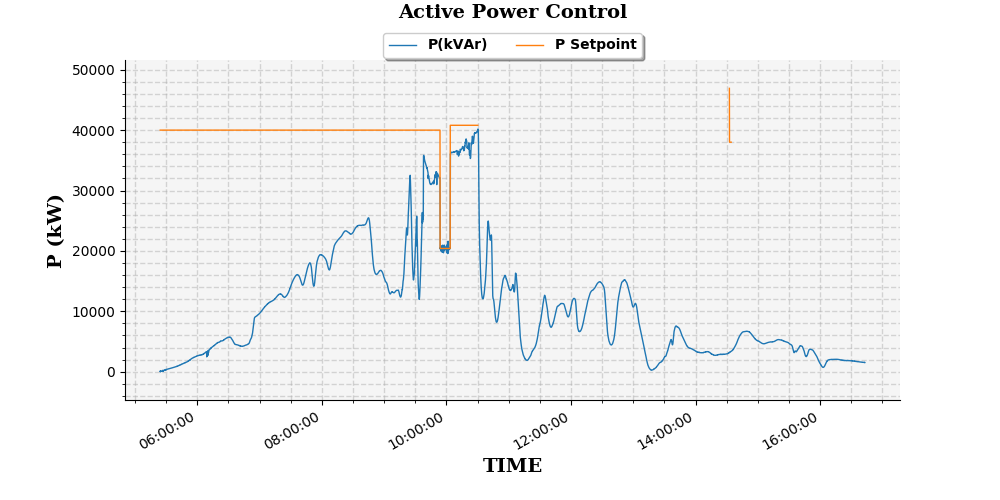

In [2]:
%matplotlib notebook
import plot_maplot_v1
data = plot_maplot_v1.get_data_from_csv("GCL_4.csv")
(time,m,s,en)=plot_maplot_v1.get_traces(data)
plot_maplot_v1.plot_P(time,m['P'],s['P'],en['P'],0)

<IPython.core.display.Javascript object>


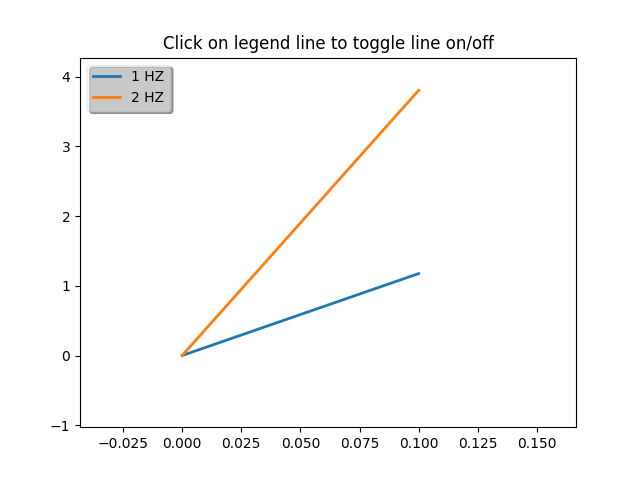

In [84]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, label='1 HZ')
line2, = ax.plot(t, y2, lw=2, label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(True)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv('grants_test1.csv',delimiter=",")

In [12]:
if "." in data['TIME'][0]:
    data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]

In [13]:
data.replace("---",np.NaN,inplace=True)
for col in data.select_dtypes('object').columns:
    try:
        data[col]=data[col].astype(float)
    except ValueError:
        continue
data = data.round(3)

In [15]:
import datetime
data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S'))

0      1900-01-01 18:56:13
1      1900-01-01 18:56:14
2      1900-01-01 18:56:15
3      1900-01-01 18:56:16
4      1900-01-01 18:56:17
               ...        
2043   1900-01-01 19:30:16
2044   1900-01-01 19:30:17
2045   1900-01-01 19:30:18
2046   1900-01-01 19:30:19
2047   1900-01-01 19:30:20
Name: TIME, Length: 2048, dtype: datetime64[ns]

In [26]:
Active =['ppc:P[^F]','.*pccm.*:ACTP_TOT',".*epm.*:ACTP_TOT",".*pccs.*:ACTP_TOT"]
Reactive =['ppc:Q.*','.*pccm.*:REACTP_TOT',".*epm.*:REACTP_TOT",".*pccs.*:REACTP_TOT"]
Voltage =['ppc:V','.*pccm.*:VABC_AVG',".*epm.*:VABC_AVG",".*pccs.*:VABC_AVG"]
Frequency=['ppc:F','.*pccm.*:F',".*epm.*:F",".*pccs.*:F"]
PowerFactor=['ppc:PF','.*pccm.*:PF',"epm.*:PF",".*pccs.*:PF"]
Active_Setpoint = ['apc:PSP']
Reactive_Setpoint = ['rpc:QSP']
QV_Setpoint = ['rpc:VSP']
AVR_Setpoint = ['avr:VSP']
Frequency_Setpoint = ['apc:FSP']
PowerFactor_Setpoint = ['pfc:PFSP']
Active_En = ['apc:En']
Reactive_En = ['rpc:En']
QV_En = ['rpc:VCEn']
AVR_En = ['avr:En']
Frequency_En = ['apc:FCEn']
PowerFactor_En = ['pfc:En']

In [27]:
import re
P = [l for k in Active for l in data.columns if re.match(k,l)]
Q = [l for k in Reactive for l in data.columns if re.match(k,l)]
V = [l for k in Voltage for l in data.columns if re.match(k,l)]
F = [l for k in Frequency for l in data.columns if re.match(k,l)]
PF = [l for k in PowerFactor for l in data.columns if re.match(k,l)]

In [29]:
PSP = [l for k in Active_Setpoint for l in data.columns if re.match(k,l)]
QSP = [l for k in Reactive_Setpoint for l in data.columns if re.match(k,l)]
QV_VSP = [l for k in QV_Setpoint for l in data.columns if re.match(k,l)]
AVR_VSP = [l for k in AVR_Setpoint for l in data.columns if re.match(k,l)]
FSP = [l for k in Frequency_Setpoint for l in data.columns if re.match(k,l)]
PFSP = [l for k in PowerFactor_Setpoint for l in data.columns if re.match(k,l)]

In [35]:
FSP[0]

IndexError: list index out of range

In [93]:
def plot_F_P(TIME,P,PSP,F,FSP,FEN,PDB):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

    
    measurement1= (0,0,104/256)
    measurement2= (62/256,150/256,81/256)
    setpoint1= (234/256,0,0)
    setpoint2 = (250/256,150/256,0)
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

    legend_font = {'weight': 'bold',
                  'size':10}

    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}
    

#     #Setpoint only when control is enabled
    PSP_copy = PSP.copy()
#     PSP_copy[PEN==0]=np.NaN

#     #Creat Figure

    fig, ax = plt.subplots(figsize=(10,5))
    ax2=ax.twinx()
    #Plot Measurement
    l1=ax.plot(TIME,P,label='P(kVAr)',color=measurement1,linewidth=1)
    l2=ax2.plot(TIME,F,label='F(Hz)',color=measurement2,linewidth=1)
    #Plot Setpoints
    l3=ax.plot(TIME,PSP_copy,label='P Setpoint',color=setpoint1,linewidth=0.5)
    lb=ax.fill_between(TIME.values,PSP_copy-PDB,PSP_copy+PDB,alpha=0.7,facecolor=l3[0].get_color())
    l4=ax2.plot(TIME,FSP,label='F Setpoint',color=setpoint2,linewidth=2)
    #Formatting axis
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
   
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.yaxis.set_minor_locator(AutoMinorLocator())

    ax.set_ylim(-0.1*(max(P.max(),PSP.max())),max(P.max(),PSP.max())*1.1)
    ax2.set_ylim(48,52)
    
    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    leg = ax.legend(lns,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lns),prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()
    
    ax.set_xlabel('TIME',fontdict=font)
    ax.set_ylabel('P (kW)',fontdict=font)
    ax2.set_ylabel('F (Hz)',fontdict=font)
    ax.tick_params(labelsize=10)
    ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.1)
    
    # we will set up a dict mapping legend line to orig line, and enable
    # picking on the legend line
    lines = [l1[0],l2[0],l3[0],l4[0]]
    lined = dict()
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(5)  # 5 pts tolerance
        lined[legline] = origline

    def onpick(event):
#         state = fig.canvas.manager.toolbar.toolmanager.active_toggle["default"]
#         print(state)
        # on the pick event, find the orig line corresponding to the
        # legend proxy line, and toggle the visibility
        legline = event.artist
        origline = lined[legline]
        vis = not origline.get_visible()
        if origline == l3[0]:
            vis_b = not lb.get_visible()
            lb.set_visible(vis_b)
        origline.set_visible(vis)
        # Change the alpha on the line in the legend so we can see what lines
        # have been toggled
        if vis:
            legline.set_alpha(1.0)
        else:
            legline.set_alpha(0.2)
        fig.canvas.draw()
    
    fig.canvas.mpl_connect('pick_event', onpick)
    plt.show()
    
    return 

<IPython.core.display.Javascript object>


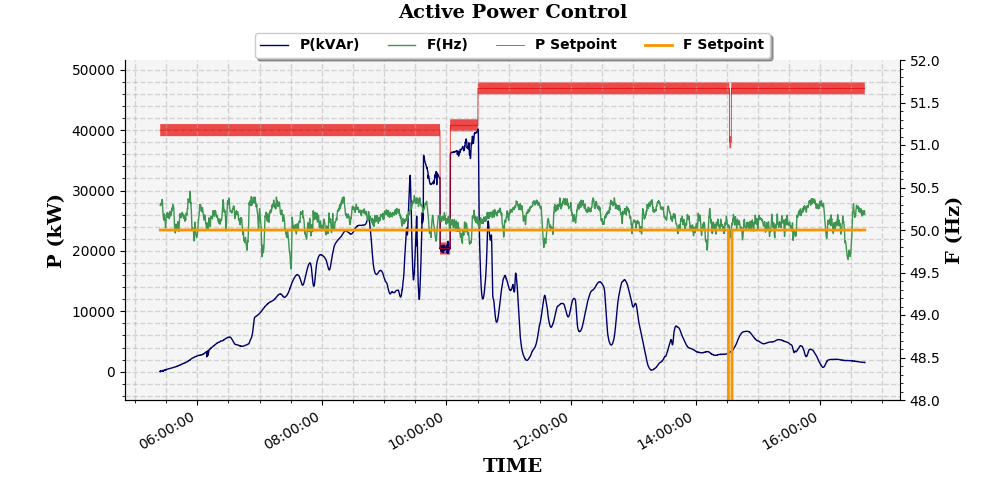

In [94]:
plot_F_P(time,m['P'],s['P'],m['F'],s['F'],en['F'],1000)

In [77]:
l.set_visible

0.7

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [24]:
(0,0,104/256)

(0, 0, 0.40625)